## RMSProp

In [1]:
from IPython.display import Image

RMSProp fixes the problem of AdaGrad which is stopping too early before reaching the global minimum. The idea is that RMSProp accumulates gradients from the most recent iterations only rather than from the beginning of the training process. The only difference from AdaGrad is that RMSProp uses exponential decay - beta (usually take the value of 0.9).

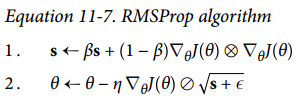

In [2]:
Image(filename='images/rmsprop.png')

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
tf.reset_default_graph()
n_inputs = 784
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

In [5]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [6]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [7]:
with tf.name_scope("loss"):
    xen = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xen, name="loss")

In [8]:
with tf.name_scope("train"):
    optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, decay=0.9)
    training_op = optimizer.minimize(loss)

In [9]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [10]:
init = tf.global_variables_initializer()

In [11]:
n_epochs = 100
batch_size = 100
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [12]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(mnist.test.labels) // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.38 Test accuracy: 0.3083
1 Train accuracy: 0.9 Test accuracy: 0.8084
2 Train accuracy: 0.99 Test accuracy: 0.914
3 Train accuracy: 0.99 Test accuracy: 0.9367
4 Train accuracy: 0.94 Test accuracy: 0.8765
5 Train accuracy: 0.98 Test accuracy: 0.9391
6 Train accuracy: 0.98 Test accuracy: 0.951
7 Train accuracy: 1.0 Test accuracy: 0.946
8 Train accuracy: 0.98 Test accuracy: 0.9137
9 Train accuracy: 0.92 Test accuracy: 0.9046
10 Train accuracy: 0.99 Test accuracy: 0.9585
11 Train accuracy: 0.98 Test accuracy: 0.9614
12 Train accuracy: 0.99 Test accuracy: 0.9554
13 Train accuracy: 0.97 Test accuracy: 0.9473
14 Train accuracy: 0.99 Test accuracy: 0.9622
15 Train accuracy: 0.98 Test accuracy: 0.9375
16 Train accuracy: 1.0 Test accuracy: 0.9643
17 Train accuracy: 0.98 Test accuracy: 0.9614
18 Train accuracy: 0.99 Test accuracy: 0.9494
19 Train accuracy: 0.99 Test accuracy: 0.962
20 Train accuracy: 1.0 Test accuracy: 0.9608
21 Train accuracy: 0.98 Test accuracy: 0.9559
22 Tra